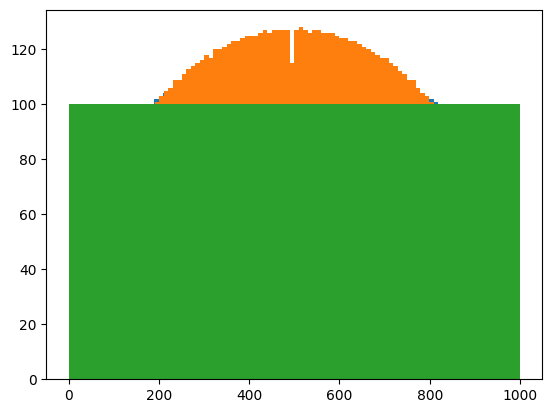

In [2]:
import matplotlib.pyplot as plt
from loss import get_multirank_stratified_random_timesteps

_ = plt.hist(get_multirank_stratified_random_timesteps(10000, device='cpu', alpha=1.25, beta=1.25), bins=100)
_ = plt.hist(get_multirank_stratified_random_timesteps(10000, device='cpu', alpha=1.5, beta=1.5), bins=100)
_ = plt.hist(get_multirank_stratified_random_timesteps(10000, device='cpu', alpha=1, beta=1), bins=100)
#_ = plt.hist(get_multirank_stratified_random_timesteps(10000, device='cpu', alpha=1.2, beta=3), bins=100)
#_ = plt.hist(get_multirank_stratified_random_timesteps(100000, device='cpu', alpha=1.2, beta=1.8), bins=100)
#_ = plt.hist(get_multirank_stratified_random_timesteps(100000, device='cpu', alpha=1.1, beta=2), bins=100)

In [9]:
from collections import Counter

counter = Counter([t.item() for t in timesteps])
[counter[i] for i in range(1000)]

[0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 2,
 1,
 0,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 2,
 2,
 2,
 1,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 1,
 3,
 3,
 1,
 3,
 2,
 3,
 2,
 3,
 3,
 2,
 3,
 2,
 3,
 3,
 3,
 3,
 2,
 3,
 3,
 3,
 3,
 4,
 2,
 3,
 4,
 3,
 3,
 4,
 3,
 4,
 3,
 3,
 4,
 3,
 4,
 3,
 4,
 4,
 3,
 5,
 3,
 4,
 4,
 3,
 5,
 3,
 5,
 4,
 4,
 3,
 5,
 4,
 4,
 4,
 5,
 4,
 4,
 5,
 5,
 4,
 4,
 5,
 4,
 5,
 4,
 6,
 4,
 5,
 5,
 5,
 5,
 4,
 5,
 4,
 6,
 5,
 5,
 5,
 5,
 5,
 6,
 4,
 6,
 6,
 5,
 5,
 5,
 6,
 6,
 4,
 7,
 5,
 6,
 5,
 6,
 6,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 5,
 7,
 5,
 6,
 7,
 7,
 6,
 5,
 7,
 7,
 5,
 7,
 7,
 5,
 7,
 7,
 6,
 7,
 6,
 7,
 7,
 6,
 7,
 7,
 7,
 6,
 8,
 6,
 7,
 7,
 7,
 7,
 7,
 8,
 6,
 7,
 8,
 6,
 8,
 7,
 8,
 7,
 7,
 7,
 8,
 7,
 8,
 8,
 7,
 8,
 7,
 8,
 8,
 7,
 8,
 7,
 9,
 7,
 8,
 8,
 7,
 9,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 9,
 7,
 8,
 9,
 8,
 9,
 7,
 9,
 9,
 8,
 8,
 9,
 8,
 9,
 8,
 9,
 9,
 9,
 8,
 9,
 8,
